# Introduction to Linear Regresssion

[Chapters 2 & 3 of Introduction to Statistical Learning by Gareth James, et al.](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

## History behind Linear Regression
English statistician, Francis Galton, was studying the relationship between parents and their children. In particular, he investigated the relationship between the height of fathers and their sons. 

What he discovered was that a man's son tended to be roughly as tall as his father. However, Galton's breakthrough was that the son's height tended to be closer to the overall average height of all people. 

A good example would be Shaquille O'Neal. Shaq is really tall. 7ft 1in (2.2m). If Shaq had a son, chances are he'll be pretty tall too, but there is a very good chance that his son will not be as tall as Shaq.

This turns out to be the case, Shaq's son is pretty tall, 6ft 7in, but not nearly as tall as his dad. 

Galton called this phenomenon __regression,__ as in "A father's son's height tends to _"regress"_ ( or drift toward) the average height"

## Example
Let's take the simplest example possible:
calculating a regression with only 2 data points

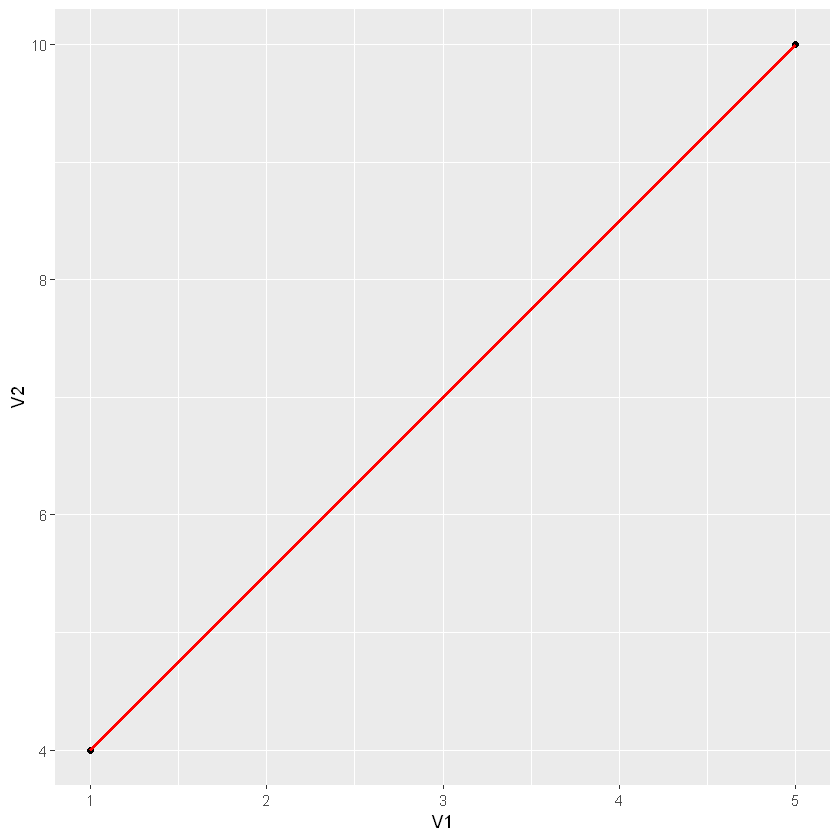

In [2]:
library(ggplot2)
df <- as.data.frame(matrix(c(1,5,4,10),nrow=2))
pl <- ggplot(data=df, aes(x=V1, y=V2))
pl + geom_point() + geom_line(color = "red", size = 1.)

All we're trying to do when we calculate our regression line is to draw a line that's as close to every dot as possible. 

For classic linear regression, or the "Least Squares Method", you only measure the closeness in the "up and down" direction

Now wouldn't it be great if we could apply the same concept toa  graph with multiple data points. Doing this, we could 

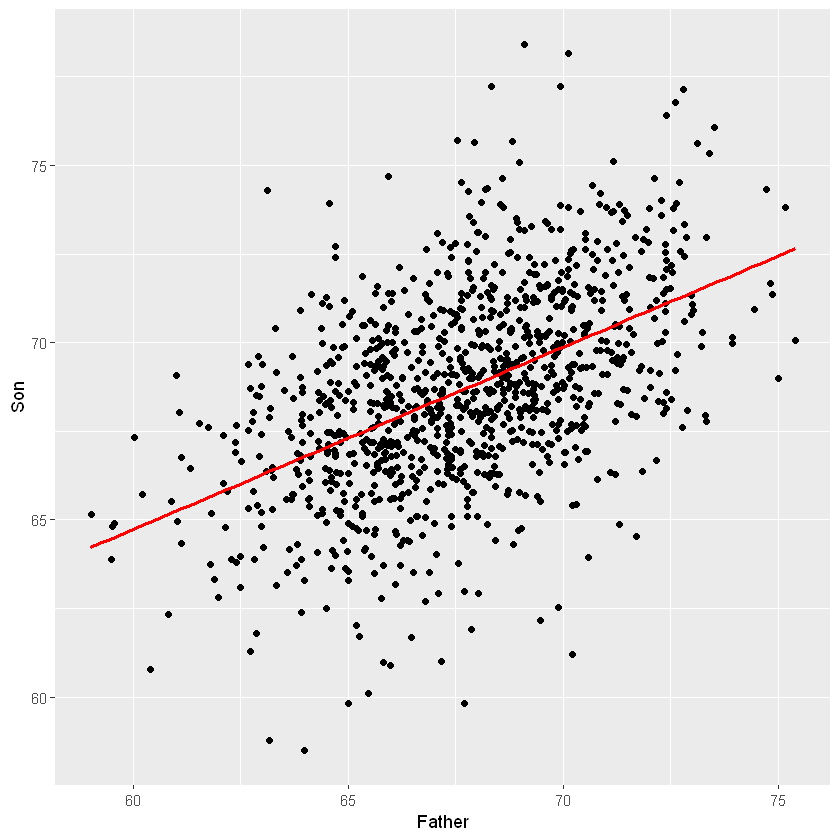

In [3]:
df2 <- read.csv("pearson.csv", header = TRUE)
pl <- ggplot(data=df2,aes(x=Father, y=Son))
pl + geom_jitter() + geom_smooth(aes(group=1),method ='lm',formula = y~x,se=FALSE,color='red')

Our goal with linear regression is to __minimize the vertical distance__ between all the data points and our line. 

So in determining the __best line__, we are attempting to minimize the distance between __all__ the points and their distance to our line

There are lots of different ways to minimize this, (sum of squared errors, sum of absolute errors, etc), but all these methods have a feneral goal of minimizing this distance.

# Using R for Linear Regression
Formulas in R take the form (y~ x). To add more predictor variables, just use the + sign. i.e.(y~x+z)

For this example, we will be using the [ Student Performance Data Set from UC Irvine's Machine Learning Repository!](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [5]:
library(ggplot2)
library(ggthemes)
library(dplyr)

# Load in the data. Note that this CSV is seperated by a semicolon
df <- read.csv("student-mat.csv", sep = ";")

In [6]:
head(df)
summary(df)
str(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

## Attribute Information
Here is the attribute information for our data set: Attribute Information:

- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - more than 1 hour)
- 14 studytime - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
- 15 failures - number of past class failures (numeric: n if between 1 and 3 , else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

__These grades are related with the course subject

- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

## Clean the Data
Next we have to clean this data. This data is actually already cleaned for you, But here are some things you may want to consider doing for other data sets:

#### Check for NA values
Let's see if we have any NA values:

In [7]:
any(is.na(df))

[1] FALSE

Great! Most real data sets will probably have NA or Null values, so its always good to check! Its up to you how to deal with them, either dropping them if they aren't too many, or imputing other values, like the mean value.

## Categorical Features
Moving on, let's make sure that categorical variables have a factor set to them. For example, the MJob column refers to categories of Job Types, not some numeric value from 1 to 5. R is actually really good at detecting these sort of values and will take of this work for you a lot of the time, but always keep in mind the use of __factor()__ as a possible. Luckily this is basically already done and we can check this using the str() function:

In [8]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

## Exploratory Data Analysis
Let's use ggplot2 to explore the data a litle before we dive in. 

In [9]:
library(ggplot2)
library(ggthemes)
library(dplyr)

## Correlation and CorrPlots

From Wikipedia, correlation is defined as:

- In statistics, dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. Familiar examples of dependent phenomena include the correlation between the physical statures of parents and their offspring, and the correlation between the demand for a product and its price.

Correlation plots are a great way of exploring data and seeing if there are any interaction terms. Let's start off by just grabbing the numeric data (we can't see correlation for categorical data):

In [10]:
# Nuneric columns only
num.cols <- sapply(df,is.numeric)

# Filter
cor.data <- cor(df[,num.cols])

print(cor.data)

                    age         Medu         Fedu   traveltime    studytime
age         1.000000000 -0.163658419 -0.163438069  0.070640721 -0.004140037
Medu       -0.163658419  1.000000000  0.623455112 -0.171639305  0.064944137
Fedu       -0.163438069  0.623455112  1.000000000 -0.158194054 -0.009174639
traveltime  0.070640721 -0.171639305 -0.158194054  1.000000000 -0.100909119
studytime  -0.004140037  0.064944137 -0.009174639 -0.100909119  1.000000000
failures    0.243665377 -0.236679963 -0.250408444  0.092238746 -0.173563031
famrel      0.053940096 -0.003914458 -0.001369727 -0.016807986  0.039730704
freetime    0.016434389  0.030890867 -0.012845528 -0.017024944 -0.143198407
goout       0.126963880  0.064094438  0.043104668  0.028539674 -0.063903675
Dalc        0.131124605  0.019834099  0.002386429  0.138325309 -0.196019263
Walc        0.117276052 -0.047123460 -0.012631018  0.134115752 -0.253784731
health     -0.062187369 -0.046877829  0.014741537  0.007500606 -0.075615863
absences    

While this is fantastic information, it's hard to take it all in. Let's visualize all this data. There are lots of amazing 3rd party packages to do this, let's use and install the 'corrgram' package and the corrplot package. This will also install a bunch of dependencies for the package.

In [12]:
# install.packages("corrgram")
library(corrgram)

# install.packages("corrplot")
library(corrplot)

Let's start by using corrplot, the most common one. [Here's a really nice documentation page on the package](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html). I encourage you to play around with it.

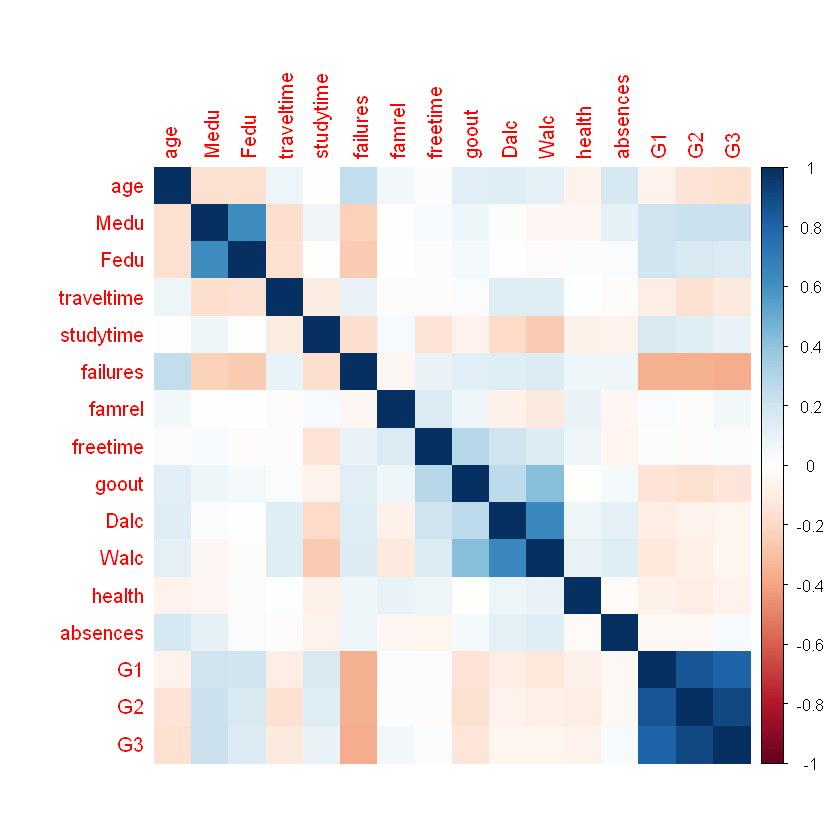

In [13]:
corrplot(cor.data, method = 'color')

Cleary we have very high correlation between G1, G2, and G3 which makes sense since those are grades:

- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

Meaning good students do well each period, and poor students do poorly each period, etc. Also a high G1,G2, or G3 value has a negative correlation with failure (number of past class failures).

Also Mother and Father education levels are correlated, which also makes sense.

We can also use the corrgram which allows to just automatically do these type of figures by just passing in the dataframe directly.

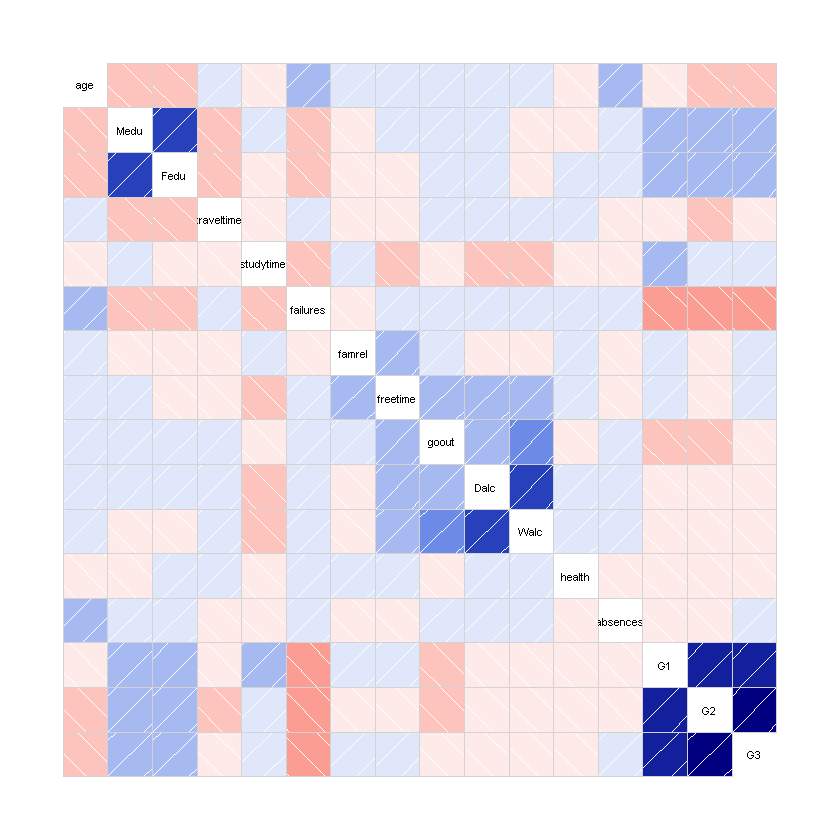

In [14]:
corrgram(df)

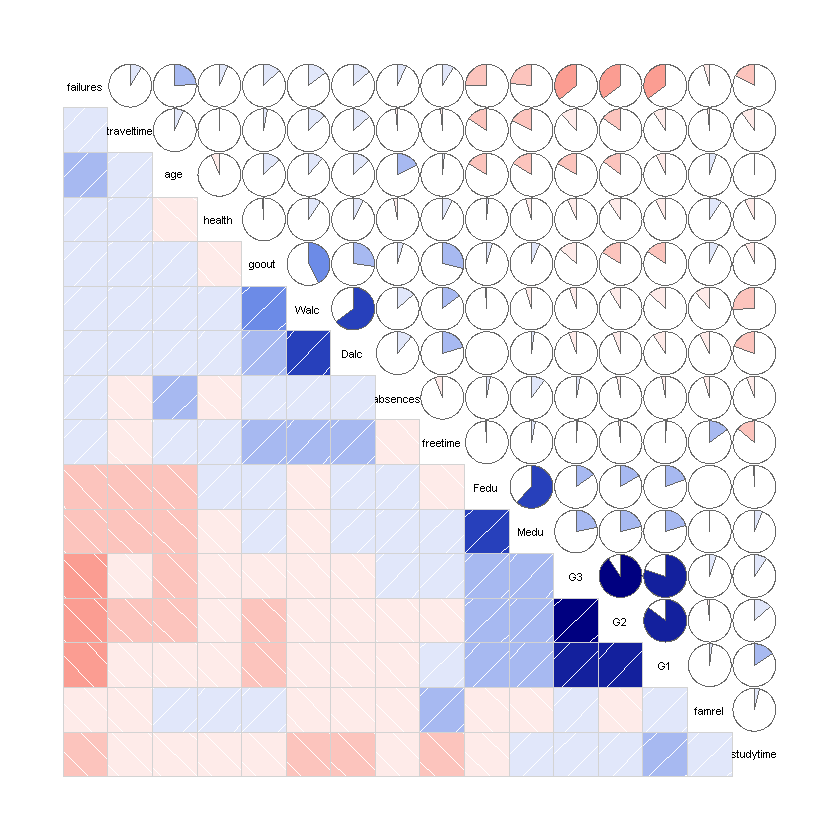

In [15]:
corrgram(df, 
         order = TRUE,
         lower.panel = panel.shade,
         upper.panel = panel.pie,
         text.panel = panel.txt) 

Since we are going to eventually build a model to predict the G3 scores, let's see what the the histogram of scores looks like first.

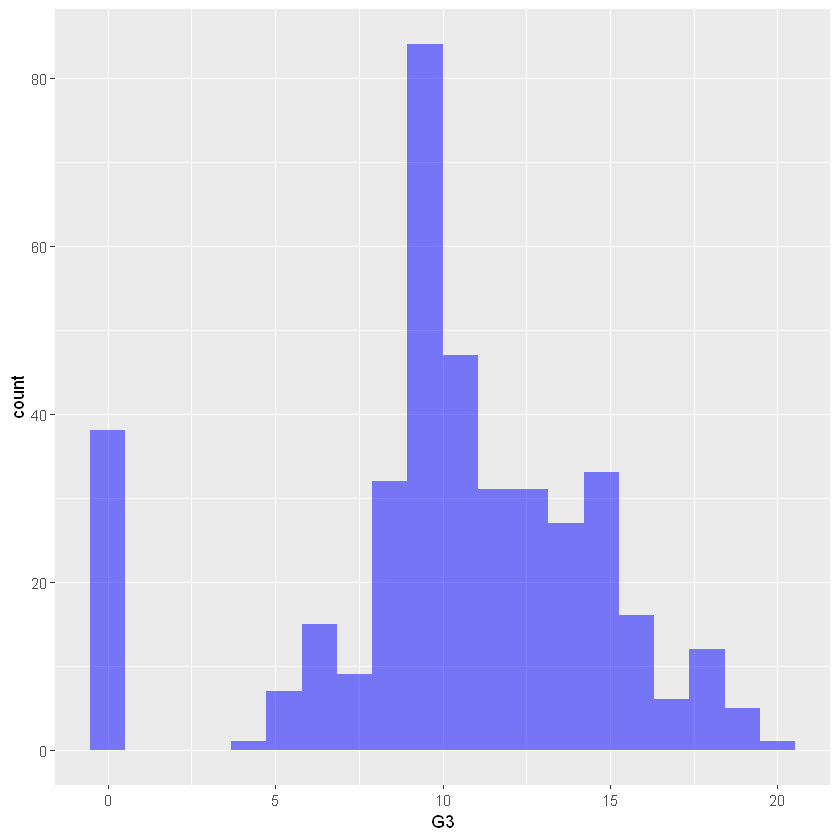

In [16]:
ggplot(df,
       aes(x = G3)
      ) + 
geom_histogram(
    bins = 20, 
    alpha = 0.5,
    fill = 'blue'
)

Looks like a lot of students got zeros on the test. This is a good place to ask questions. Are students missing the test?

## Building a Model

#### General Form:

The general model of building a linear regresssion model in R looks like this:
   
```
    
   model <- lm( y ~ x1 + x2, data) # Uses selected features '
   
    or to use all the features in your data
   
    model <- lm( y ~ . , data) # Uses all the features
    
```

### Train and Test Data
We'll need to split our data into a training set and a testing test in order to test our accuracy. We can do this easily using the caTools library.

In [17]:
#install.packages("caTools")

In [19]:
library(caTools)

# Set a random seed so your "random" results will be the same as mine
set.seed(101)

# Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(df$G3, SplitRatio = 0.70)

# Training Data
train <- subset(df, sample == TRUE)

# Testing Data
test <- subset(df, sample == FALSE)

### Training our Model
Let's train our model on our training data, then ask for a summary of that model.

In [20]:
model <- lm (G3 ~. , data = train)
summary(model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4250 -0.6478  0.2844  1.0442  4.9840 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.70763    2.69488   1.376  0.17019    
schoolMS          0.66981    0.47436   1.412  0.15926    
sexM              0.25730    0.29257   0.879  0.38006    
age              -0.36163    0.12949  -2.793  0.00566 ** 
addressU          0.08123    0.35652   0.228  0.81996    
famsizeLE3        0.12222    0.28709   0.426  0.67070    
PstatusT          0.06807    0.43032   0.158  0.87444    
Medu              0.11100    0.18757   0.592  0.55455    
Fedu             -0.16373    0.15928  -1.028  0.30503    
Mjobhealth       -0.63993    0.65314  -0.980  0.32820    
Mjobother        -0.15730    0.42323  -0.372  0.71048    
Mjobservices     -0.15872    0.46682  -0.340  0.73415    
Mjobteacher      -0.04930    0.62335  -0.079  0.93702    
Fjobhealth        0.17565    0.83034 

## Model Interpretation
Understanding requires a general understanding of statistics, check out Wikipedia for overviews on some of these topics, as well as the ISLR book. Here's a quick guide on understanding the model summary:

| Name | Description |
| :-----------: | :----------- |
| Residuals | The residuals are the difference between the actual values of the variable you're predicting and predicted values from your regression--y - ŷ. For most regressions you want your residuals to look like a normal distribution when plotted. If our residuals are normally distributed, this indicates the mean of the difference between our predictions and the actual values is close to 0 (good) and that when we miss, we're missing both short and long of the actual value, and the likelihood of a miss being far from the actual value gets smaller as the distance from the actual value gets larger.Think of it like a dartboard. A good model is going to hit the bullseye some of the time (but not everytime). When it doesn't hit the bullseye, it's missing in all of the other buckets evenly (i.e. not just missing in the 16 bin) and it also misses closer to the bullseye as opposed to on the outer edges of the dartboard.|
| Significance Stars | The stars are shorthand for significance levels, with the number of asterisks displayed according to the p-value computed. *** for high significance and * for low significance. In this case, *** indicates that it's unlikely that no relationship exists b/w absences and G3 scores. |
| Estimated Coefficients | The estimated coefficient is the value of slope calculated by the regression. It might seem a little confusing that the Intercept also has a value, but just think of it as a slope that is always multiplied by 1. This number will obviously vary based on the magnitude of the variable you're inputting into the regression, but it's always good to spot check this number to make sure it seems reasonable. |
| Standard Error of the Coefficients | Measure of the variability in the estimate for the coefficient. Lower means better but this number is relative to the value of the coefficient. As a rule of thumb, you'd like this value to be at least an order of magnitude less than the coefficient estimate. |
| t-value of the Coefficient Estimate | core that measures whether or not the coefficient for this variable is meaningful for the model. You probably won't use this value itself, but know that it is used to calculate the p-value and the significance levels. |
| Variable p-value | Probability the variable is NOT relevant. You want this number to be as small as possible. If the number is really small, R will display it in scientific notation. |
| Significance Legend | The more punctuation there is next to your variables, the better.Blank=bad, Dots=pretty good, Stars=good, More Stars=very good |
| Residual Std Error / Degrees of Freedom | The Residual Std Error is just the standard deviation of your residuals. You'd like this number to be proportional to the quantiles of the residuals in #1. For a normal distribution, the 1st and 3rd quantiles should be 1.5 +/- the std error. The Degrees of Freedom is the difference between the number of observations included in your training sample and the number of variables used in your model (intercept counts as a variable). |
| R-squared	 | 	Metric for evaluating the goodness of fit of your model. Higher is better with 1 being the best. Corresponds with the amount of variability in what you're predicting that is explained by the model. |
| F-statistic & resulting p-value | Performs an F-test on the model. This takes the parameters of our model (in our case we only have 1) and compares it to a model that has fewer parameters. In theory the model with more parameters should fit better. If the model with more parameters (your model) doesn't perform better than the model with fewer parameters, the F-test will have a high p-value (probability NOT significant boost). If the model with more parameters is better than the model with fewer parameters, you will have a lower p-value. The DF, or degrees of freedom, pertains to how many variables are in the model. In our case there is one variable so there is one degree of freedom. |

So it looks like Absences, G1 and G2 scores are good predictors and age and activiies are also possible contributors to the model

## Visualize our Model
We can visualize our linear regression model by plotting out the residuals, the residuals are basically a measure of how off we are for each point in the plot versus our model (the error).

In [21]:
res <- residuals(model)
class(res)

[1] "numeric"

In [22]:
res <- as.data.frame(res)
head(res)

,res
,<dbl>
1,1.4684389
2,1.8826707
3,1.1866990
6,-2.2440152
9,0.5974865
11,0.8583062


Why Plot the Residuals?

We want a histogram of our residuals to be normally distributed, something with a strong bimodal distribution may be a warning that our data was not a good fit for linear regression. However, this can also be hidden from our model. 

<img src = "https://dg77b7lskpws8.cloudfront.net/wp-content/uploads/2017/02/anscombe-quartet.png">

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


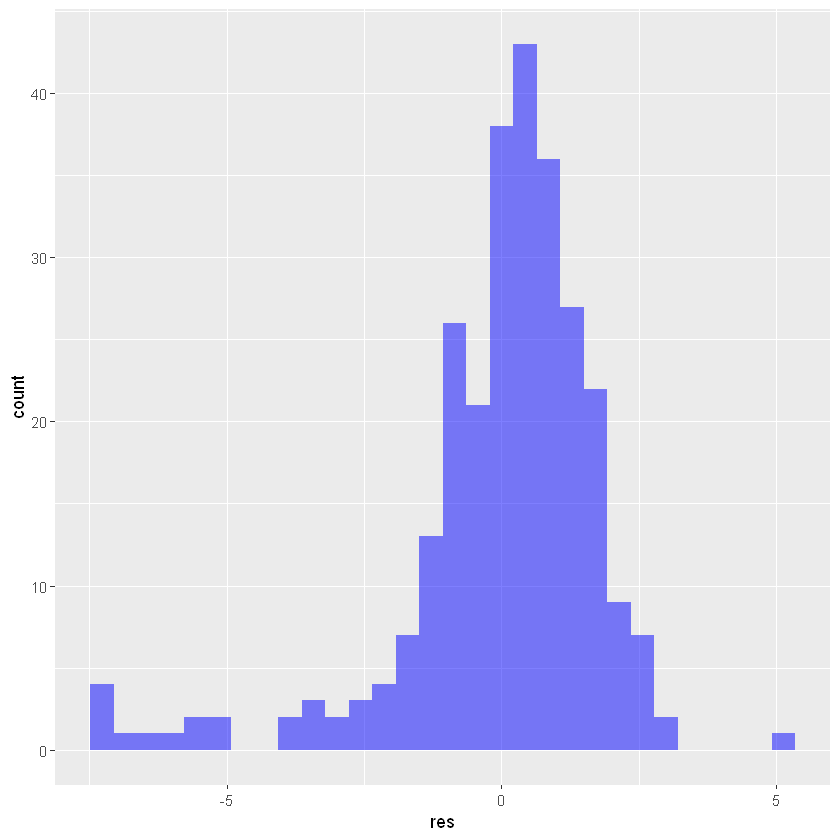

In [23]:
ggplot(res, aes(res))+ geom_histogram(fill = 'blue', alpha = 0.5)

Looks like there are some suspicious residual values that have a value less than -5. We can further explore this by just calling plot on our model. What these plots represent is outside the course of this lecture, but it's covered in ISLR, as well as the Wikipedia page on Regression Validation.

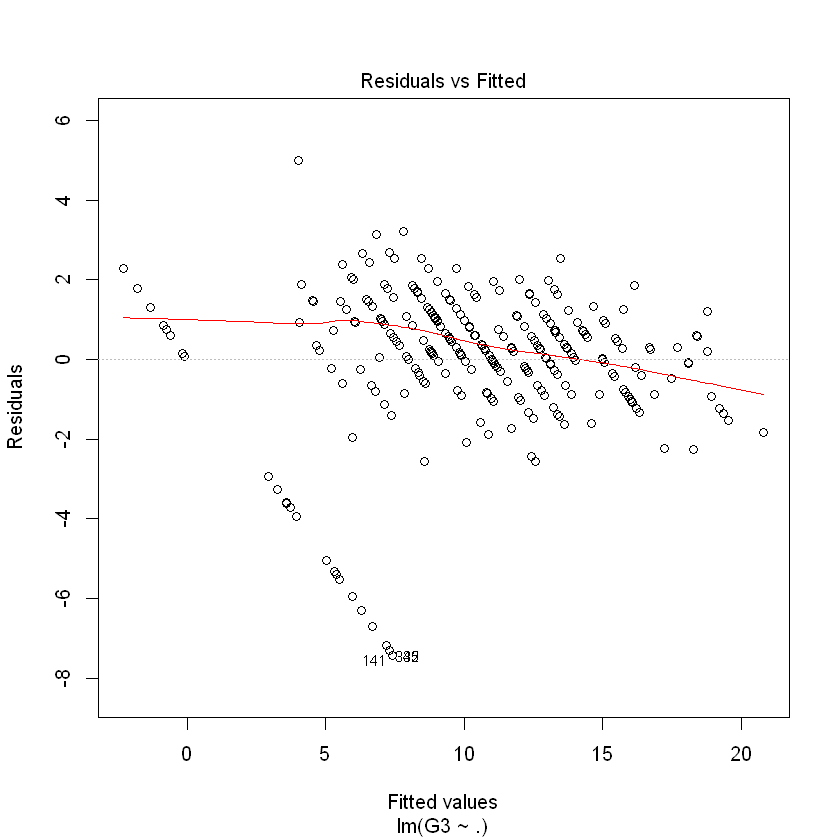

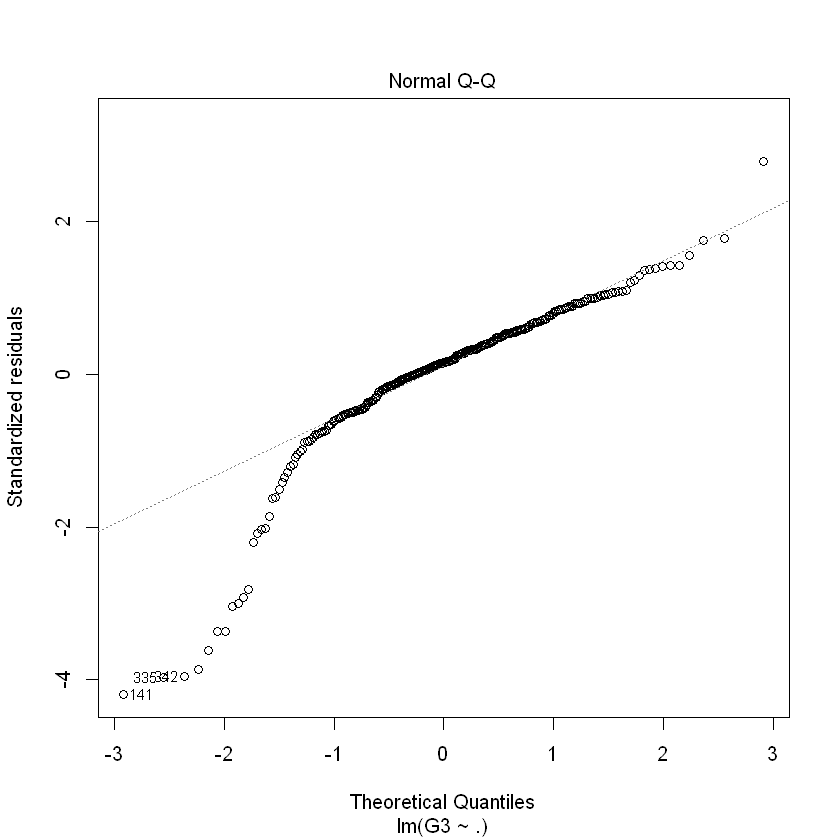

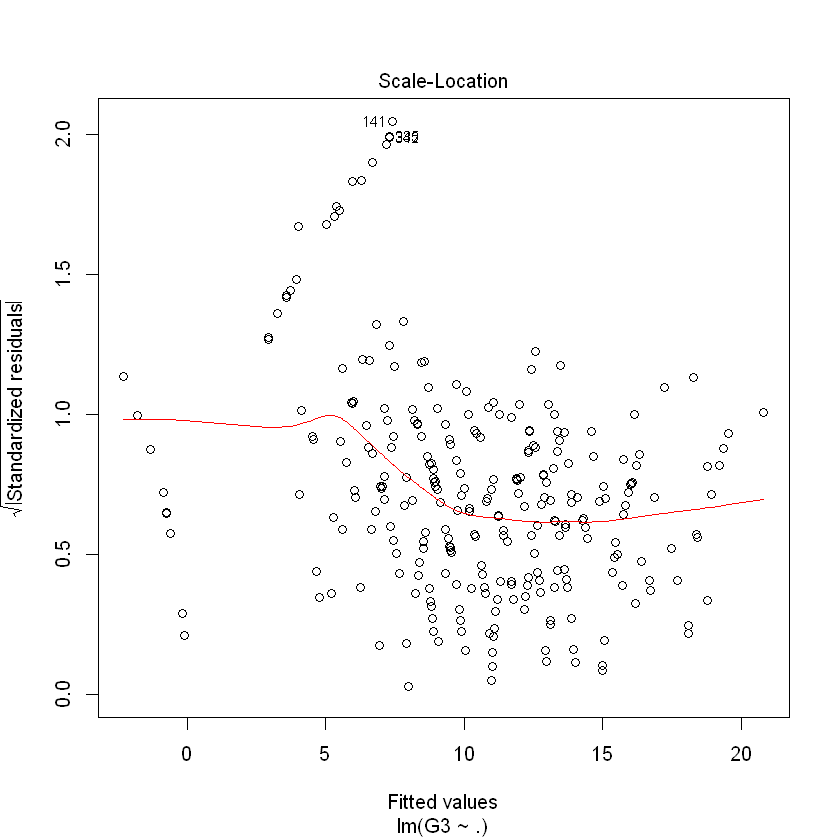

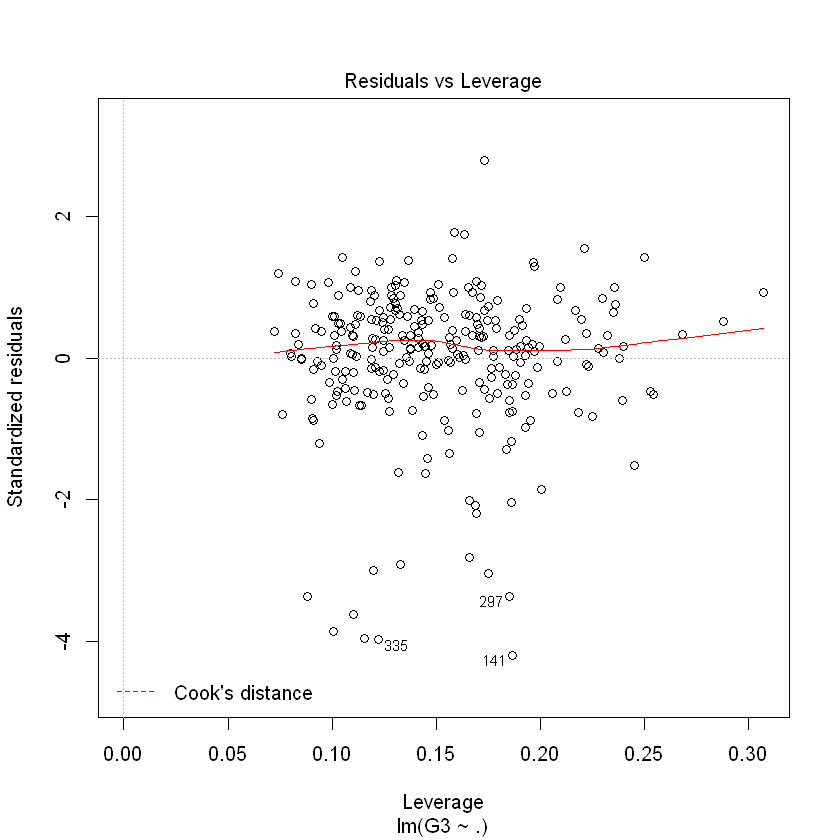

In [24]:
plot(model)

Basically after looking at these plots what you will realize is that our model (behaving as a continuous line, predicted students would get negative scores on their test! Let's make these all zeros when running our results against our predictions.

## Predictions
Let's test our model by predicting on our testing set:

In [25]:
G3.predictions <- predict(model, test)

Now we can get the root mean squared error, a standardized measure of how off we were with our predicted values:

     predicted actual
4   12.6825067     15
5    9.4336769     10
7   11.3123105     11
8    3.1015305      6
10  15.5646743     15
13  14.1903603     14
21  14.6014273     15
25   9.1914195      8
30  12.3525888     11
32  16.2922426     17
39  12.5533857     11
40  14.5733625     13
42  13.3614557     12
49  16.1217573     14
54   9.0446862     11
57  14.6141184     15
61   9.5080892     11
62   7.5710920     11
64   8.8472173      9
65   9.3670135     10
71  15.6454393     15
75  16.2834668     11
77  11.4850585     10
79   7.4548692     10
84  15.9082651     15
86   8.2599349      8
90   8.1169413      7
91   5.6803442      8
101  7.2175201      5
105 18.3876481     18
114 21.1555406     19
116 15.6866089     16
119  7.9292306      8
121 14.7037354     15
129  1.6560062      0
136 -0.5722479      0
144 14.0271825     13
149  5.4024220      0
154 -2.0734087      0
155 10.1102414     12
156  7.7569948      8
161  5.0096361      0
162  8.7189636      7
164 10.5773936     10
165  7.015

[1] -2.795582

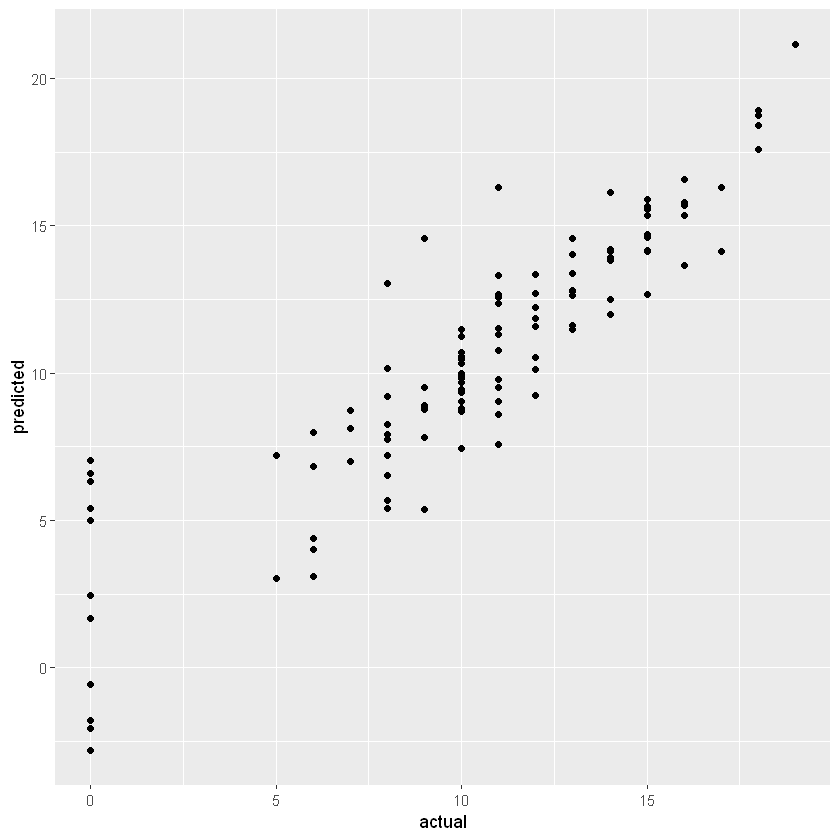

In [26]:
results <- cbind(G3.predictions, test$G3)
colnames(results) <- c('predicted','actual')
results <- as.data.frame(results)
print(results)

pl <- ggplot(data = results, aes(x = actual, y = predicted)) +geom_point()
pl

min(results$predicted)

Now let's take care of negative predictions! Lot's of ways to this, here's a more complicated way, but its a good example of creating a custom function for a custom problem:

In [27]:
to_zero <- function(x){
    if (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [28]:
results$predicted <- sapply(results$predicted, to_zero)

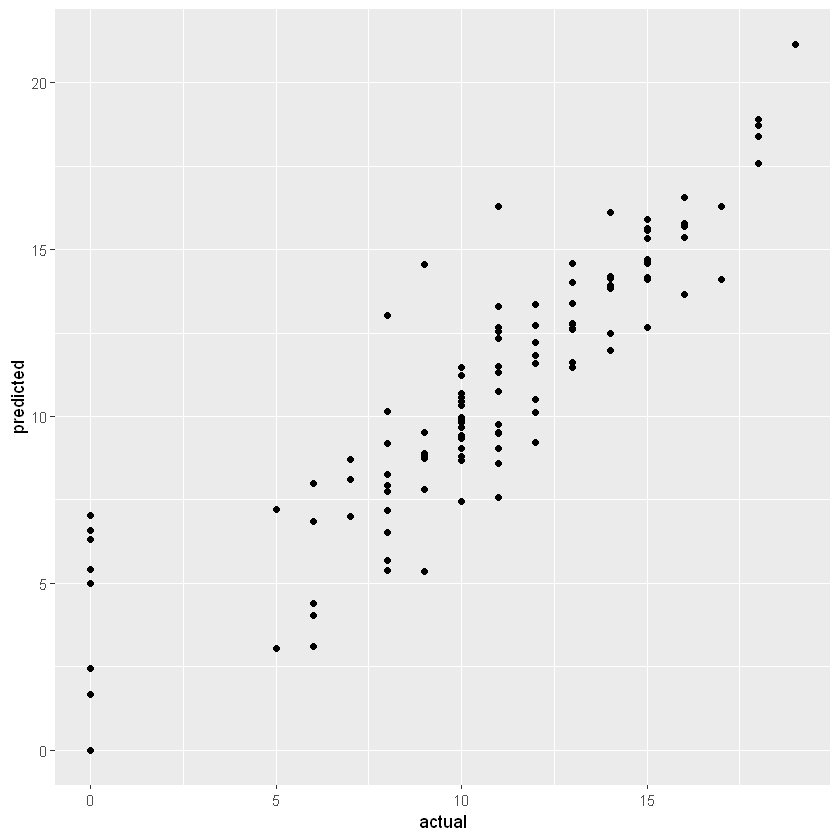

In [29]:
pl <- ggplot(data = results, aes(x = actual, y = predicted)) +geom_point()
pl

There's lots of ways to evaluate the prediction values, for example the MSE (mean squared error):



In [30]:
mse <- mean( ( results$actual - results$predicted)^2)
mse # Mean Squared Error
mse^0.5 # Root Mean Squared Error

[1] 3.991675

[1] 1.997918

Or we can calculate the R-Squared Value for our model (just for predictions)

In [31]:
SSE <- sum((results$predicted - results$actual)^2)
SST <- sum((mean(df$G3)- results$actual)^2)

R2 <- 1 - (SSE/SST)

R2

[1] 0.8044477